In [137]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [138]:
def dict_size(dict):
    total_count = sum(len(values) for values in dict.values())
    print(total_count)

In [139]:
def base_accuracy(csv_path):

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    # Strip and convert labels to lowercase
    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            vehicle_name = path_parts[-2].strip().lower()  

            # Check if the label and vehicle name match in the dictionary
            if row['label'] == vehicle_name:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [140]:
def check_accuracy(csv_path, dictionary):

    normalized_dict = {key.lower(): [value.lower() for value in values] for key, values in dictionary.items()}

    # Create a reverse lookup dictionary
    reverse_dict = {}
    for key, values in normalized_dict.items():
        for value in values:
            reverse_dict[value] = key  # Map all variations to the primary key

    data = pd.read_csv(csv_path, header=None, names=['file_path', 'label'])

    data['label'] = data['label'].str.strip().str.lower()

    count = 0
    total = 0

    for index, row in data.iterrows():

        path_parts = row['file_path'].split('/')
        if len(path_parts) > 2:
            name = path_parts[-2].strip().lower()  # Normalize name

            # Find the primary key for the label using the reverse lookup dictionary
            primary_key = reverse_dict.get(row['label'], None)

            if primary_key and name in normalized_dict[primary_key]:
                count += 1
        total += 1

    accuracy = count / total if total > 0 else 0
    return round(accuracy * 100, 2)

In [141]:
print(base_accuracy("AO.csv"))

97.58


In [142]:
dict_8 = {
    "Buffalo": ["Buffalo", "Buffaloes"],
    "Elephant": ["Elephant", "Elephants"],
    "Rhino": ["Rhino", "Rhinoceros"],
    "Zebra": ["Zebra", "Zebras"],
}

#Buffalo,Buffaloes,Elephant,Elephants,Rhino,Rhinoceros,Zebra,Zebras

dict_size(dict_8)
print(check_accuracy("AO8.csv", dict_8))

8
96.73


In [143]:
dict_12 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Elephant, Elephants, Picture of Elephant, Rhino, Rhinoceros, Picture of Rhino, Zebra, Zebras, Picture of Zebra

dict_size(dict_12)
print(check_accuracy("AO12.csv", dict_12))


12
95.53


In [144]:
dict_16 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra

dict_size(dict_16)
print(check_accuracy("AO16.csv", dict_16))


16
96.45


In [145]:
dict_20 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra

dict_size(dict_20)
print(check_accuracy("AO20.csv", dict_20))


20
96.93


In [146]:
dict_24 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd

dict_size(dict_24)
print(check_accuracy("AO24.csv", dict_24))


24


96.93


In [147]:
dict_32 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild

dict_size(dict_32)
print(check_accuracy("AO32.csv", dict_32))


32
98.88


In [148]:
dict_36 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra

dict_size(dict_36)
print(check_accuracy("AO36.csv", dict_36))


36
98.9


In [149]:
dict_40 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains

dict_size(dict_40)
print(check_accuracy("AO40.csv", dict_40))


40
98.9


In [150]:
dict_44 = {#problem
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra

dict_size(dict_44)
print(check_accuracy("AO44.csv", dict_44))


44
98.9


In [151]:
dict_48 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra

dict_size(dict_48)
print(check_accuracy("AO48.csv", dict_48))


48
98.9


In [152]:
dict_52 = {
    "Buffalo": ["Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd", "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo", "American Buffalo", "Buffalo in Herds"],
    "Elephant": ["Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd", "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant", "Asian Elephant", "Elephant in Herds"],
    "Rhino": ["Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd", "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino", "Black Rhino", "Rhino in Herds"],
    "Zebra": ["Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd", "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra", "Wild Plains Zebra", "Zebra in Herds"],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds

dict_size(dict_52)
print(check_accuracy("AO52.csv", dict_52))


52
98.9


In [153]:
dict_56 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra

dict_size(dict_56)
print(check_accuracy("AO56.csv", dict_56))


56
98.93


In [154]:
dict_60 = {
    "Buffalo": [
        "Buffalo", "Buffaloes", "Picture of Buffalo", "Image of Buffalo", "Wild Buffalo", "Buffalo Herd",
        "African Buffalo", "Buffalo in the Wild", "Large Buffalo", "Buffalo Plains", "Moving Buffalo",
        "American Buffalo", "Buffalo in Herds", "Savannah Buffalo", "Horned Buffalo"
    ],
    "Elephant": [
        "Elephant", "Elephants", "Picture of Elephant", "Image of Elephant", "Wild Elephant", "Elephant Herd",
        "African Elephant", "Elephant in the Wild", "Large Elephant", "Elephant Plains", "Moving Elephant",
        "Asian Elephant", "Elephant in Herds", "Savannah Elephant", "Tusker Elephant"
    ],
    "Rhino": [
        "Rhino", "Rhinoceros", "Picture of Rhino", "Image of Rhino", "Wild Rhino", "Rhino Herd",
        "African Rhino", "Rhino in the Wild", "Large Rhino", "Rhino Plains", "Moving Rhino",
        "Black Rhino", "Rhino in Herds", "Savannah Rhino", "Horned Rhino"
    ],
    "Zebra": [
        "Zebra", "Zebras", "Picture of Zebra", "Image of Zebra", "Wild Zebra", "Zebra Herd",
        "African Zebra", "Zebra in the Wild", "Large Zebra", "Zebra Plains", "Moving Zebra",
        "Wild Plains Zebra", "Zebra in Herds", "Savannah Zebra", "Mountain Zebra"
    ],
}

# Buffalo, Buffaloes, Picture of Buffalo, Image of Buffalo, Wild Buffalo, Buffalo Herd, African Buffalo, Buffalo in the Wild, Large Buffalo, Buffalo Plains, Moving Buffalo, American Buffalo, Buffalo in Herds, Savannah Buffalo, Horned Buffalo, Elephant, Elephants, Picture of Elephant, Image of Elephant, Wild Elephant, Elephant Herd, African Elephant, Elephant in the Wild, Large Elephant, Elephant Plains, Moving Elephant, Asian Elephant, Elephant in Herds, Savannah Elephant, Tusker Elephant, Rhino, Rhinoceros, Picture of Rhino, Image of Rhino, Wild Rhino, Rhino Herd, African Rhino, Rhino in the Wild, Large Rhino, Rhino Plains, Moving Rhino, Black Rhino, Rhino in Herds, Savannah Rhino, Horned Rhino, Zebra, Zebras, Picture of Zebra, Image of Zebra, Wild Zebra, Zebra Herd, African Zebra, Zebra in the Wild, Large Zebra, Zebra Plains, Moving Zebra, Wild Plains Zebra, Zebra in Herds, Savannah Zebra, Mountain Zebra

dict_size(dict_60)
print(check_accuracy("AO60.csv", dict_60))


60
98.95


# Graphing

In [155]:
aO_counts = {
    4 : [base_accuracy("AO.csv")],
    8 : [check_accuracy("AO8.csv", dict_8)],
    12 : [check_accuracy("AO12.csv", dict_12)],
    16 : [check_accuracy("AO16.csv", dict_16)],
    20 : [check_accuracy("AO20.csv", dict_20)],
    24 : [check_accuracy("AO24.csv", dict_24)],
    32 : [check_accuracy("AO32.csv", dict_32)],
    36 : [check_accuracy("AO36.csv", dict_36)],
    40 : [check_accuracy("AO40.csv", dict_40)],
    44 : [check_accuracy("AO44.csv", dict_44)],
    48 : [check_accuracy("AO48.csv", dict_48)],
    52 : [check_accuracy("AO52.csv", dict_52)],
    56 : [check_accuracy("AO56.csv", dict_56)],
    60 : [check_accuracy("AO60.csv", dict_60)]
}

v7_counts = {
    7 : [96.73],
    14 : [84.45],
    21 : [88.35],  
    42 : [93.47],
    49 : [93.5],
    56 : [95.17],
    63 : [93.74],
    70 : [95.08]
}


In [156]:
def append_accuracies(category_counts, label, color):
    amount_categories = []
    accuracies = []

    # Calculate accuracy for each category count
    for count, accuracy in category_counts.items():
        if isinstance(accuracy, list):
            for each in accuracy:
                amount_categories.append(count)
                accuracies.append(each)
        else:
            amount_categories.append(count)
            accuracies.append(accuracy)

    # Debug print
    print(len(amount_categories), len(accuracies))
    
    # Plot data with the specified label and color
    plt.plot(amount_categories, accuracies, marker='o', linestyle='None', color=color, label=label)


14 14
8 8


/tmp/ipykernel_3297/10693897.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


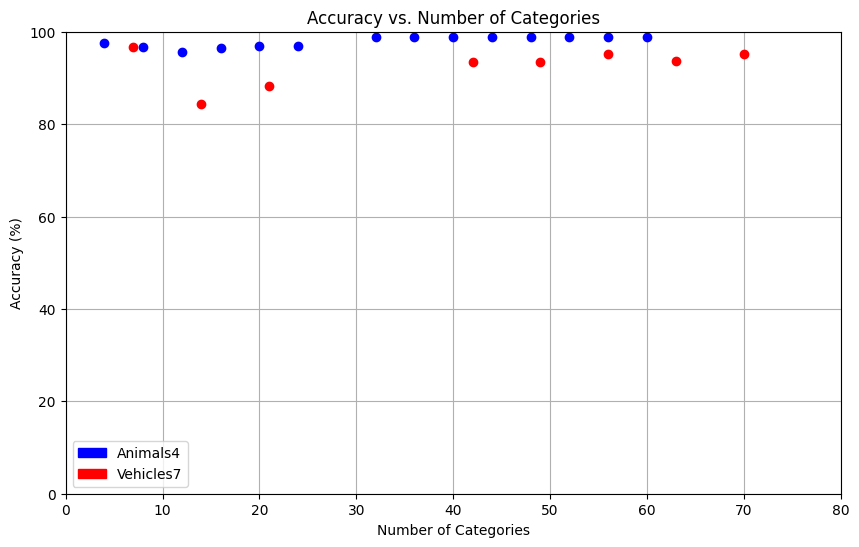

In [ ]:
plt.figure(figsize=(10, 6))
plt.xlabel('Number of Categories')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy vs. Number of Categories')
plt.grid()
plt.legend()

#Calling function
append_accuracies(aO_counts,"Animals4", "blue")
append_accuracies(v7_counts,"Vehicles7", "red")

blue_patch = mpatches.Patch(color='blue', label='Animals4')
red_patch = mpatches.Patch(color='red', label='Vehicles7')
plt.legend(handles=[blue_patch, red_patch])

#Axis ranges

plt.xlim(0, 80)  
plt.ylim(0, 100)

plt.show()